In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Importing Data

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df = df.iloc[:, 1:]

In [5]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [6]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [7]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

## Data Cleaning

In [8]:
df.select_dtypes(exclude=['number'])

,track_id,artists,album_name,track_name,explicit,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,False,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,False,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,False,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,False,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,False,acoustic
...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,False,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,False,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,False,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,False,world-music


In [24]:
df['explicit'] = df['explicit'].astype(int)


In [25]:
df['explicit'].value_counts()

explicit
0    104253
1      9747
Name: count, dtype: int64

In [9]:
df['album_name'].value_counts()

album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
                              ... 
A Greater Song (Live)            1
This is Thetahealing             1
Phenomena (DA DA) Remixes        1
What A Beautiful Name - EP       1
The Boy Who Never                1
Name: count, Length: 46589, dtype: int64

In [10]:
df['artists'].value_counts()

artists
The Beatles                           279
George Jones                          271
Stevie Wonder                         236
Linkin Park                           224
Ella Fitzgerald                       222
                                     ... 
Hillsong Worship;TAYA;David Ware        1
for KING & COUNTRY;Andy Mineo           1
Bethel Music;Francesca Battistelli      1
Descansa                                1
Jesus Culture                           1
Name: count, Length: 31437, dtype: int64

In [11]:
df['track_genre'].value_counts()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, Length: 114, dtype: int64

## Exploratory Data Analysis

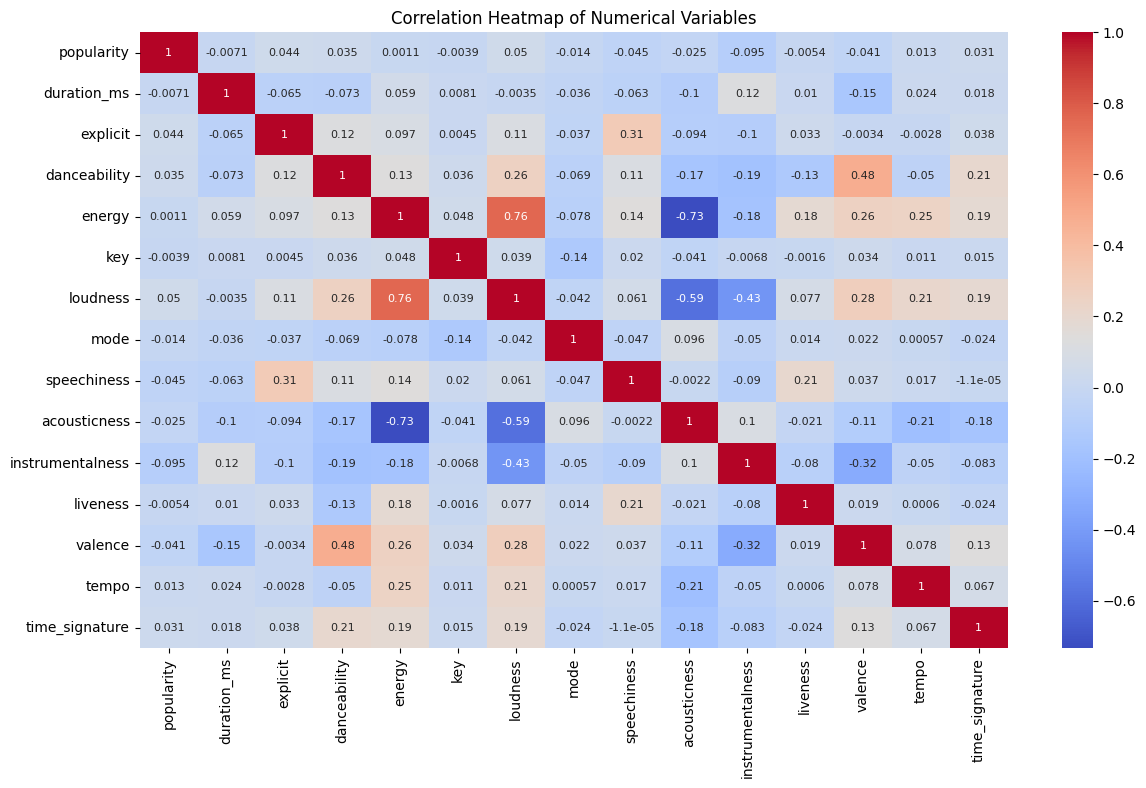

In [13]:
numerical= df.select_dtypes(exclude = ['object'])
correlation_matrix = numerical.corr()

plt.figure(figsize = (14, 8))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm', annot_kws={'size': 8})
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Data Analysis

In [17]:
df.select_dtypes(exclude=['object'])

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [18]:
formula = "popularity ~ duration_ms + explicit + danceability + energy + key + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + time_signature"
model = smf.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 11 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:40:37   Log-Likelihood:            -5.1427e+05
No. Observations:              114000   AIC:                         1.029e+06
Df Residuals:                  113985   BIC:                         1.029e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           33.1117      0.882  

In [19]:
exog = model.model.exog
names = model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: duration_ms:  1.058
VIF: explicit:  1.141
VIF: danceability:  1.548
VIF: energy:  4.268
VIF: key:  1.021
VIF: loudness:  3.286
VIF: mode:  1.042
VIF: speechiness:  1.230
VIF: acousticness:  2.425
VIF: instrumentalness:  1.468
VIF: liveness:  1.143
VIF: valence:  1.585
VIF: tempo:  1.092
VIF: time_signature:  1.080


In [21]:
df['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
98         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64